# KPSS 검정을 이용하여 정상시계열인지를 판단

이번 실습에서는 유의수준 0.01로 두고 정상시계열인지 여부를 판단합니다.<br/>

In [1]:
#install.packages("ur.kpss")
library(fpp2)
library(forecast)
library(urca)

summary(ur.kpss(goog200))

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Loading required package: forecast

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"
Warning message:
"package 'urca' was built under R version 3.6.3"



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 2.7441 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [2]:
# goog200 차분데이터
summary(ur.kpss(diff(goog200)))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.1163 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.047 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


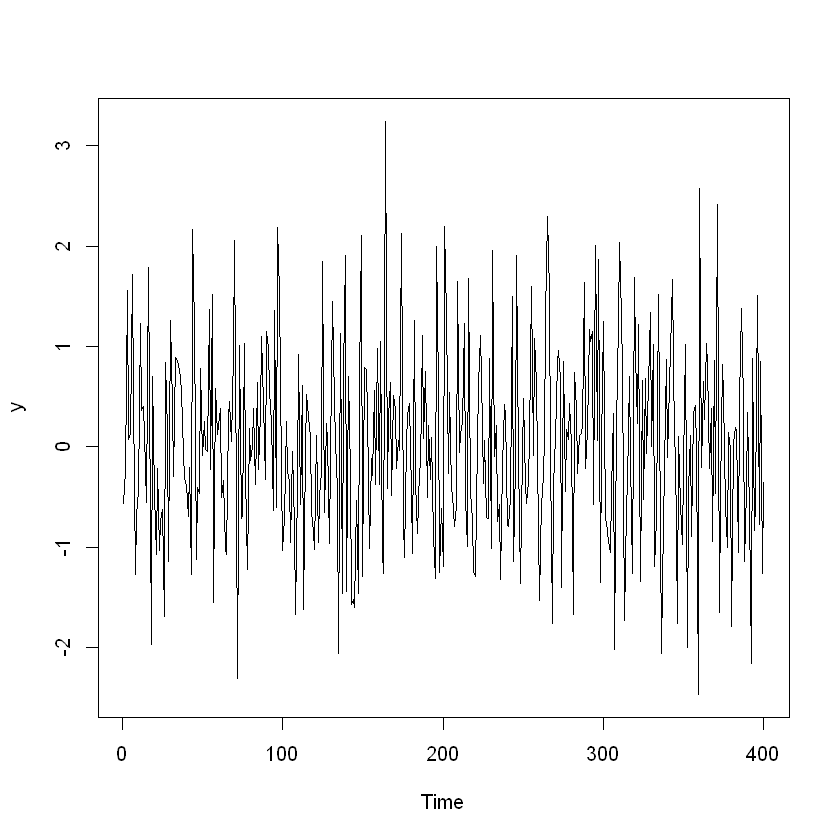

In [3]:
# 백색잡음 400개
set.seed(123)
y <- ts(rnorm(400))

plot(y)
summary(ur.kpss(y))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 2.7823 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


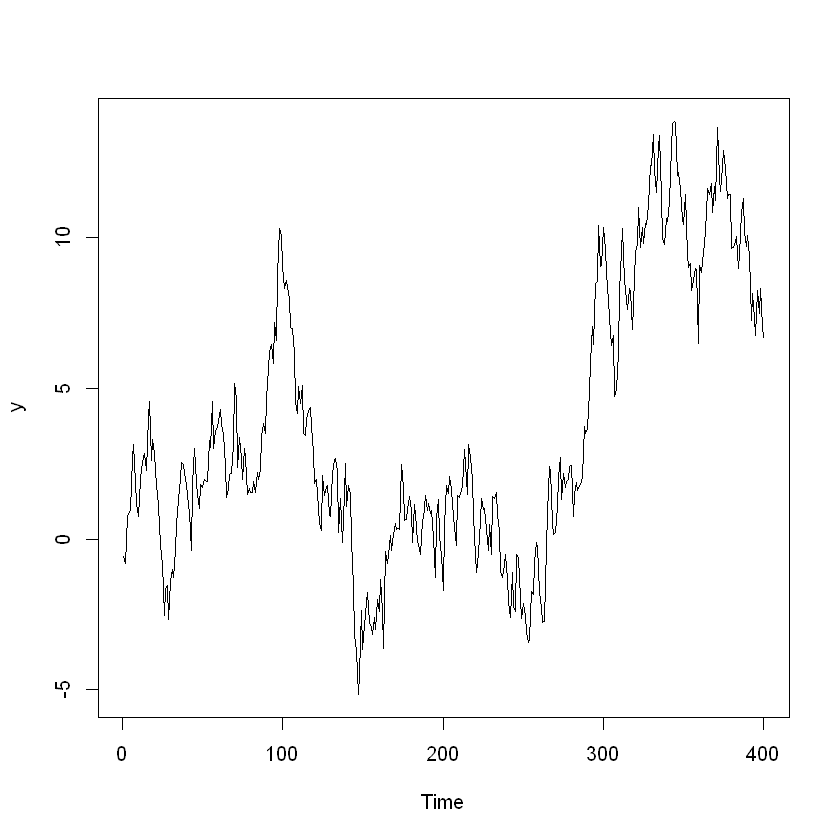

In [4]:
# 랜덤워크 모형 400개
set.seed(123)
y <- ts(rnorm(400))
ts_rw <- y

for (t in 2:400){
    y[t] = y[t-1] + ts_rw[t] # random walk process
}

plot(y)
summary(ur.kpss(y))



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 6.6883 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


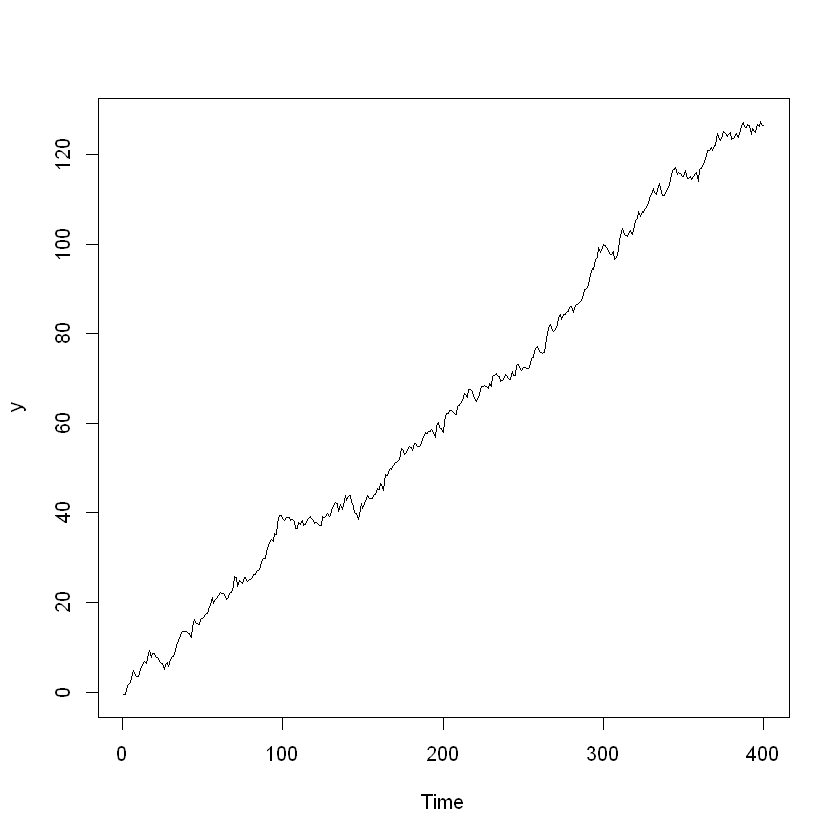

In [5]:
# 추세가 0.3인 랜덤워크 모형 400개
set.seed(123)
y <- ts(rnorm(400))
ts_rw <- y

for (t in 2:400){
    y[t] = 0.3 + y[t-1] + ts_rw[t] # random walk process
}

plot(y)
summary(ur.kpss(y))
